#### Excercise problem

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df=pd.read_csv('HR.csv')
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [53]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [54]:
df.shape

(14999, 10)

In [55]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [56]:
left=df[df['left']==1]
left.shape

(3571, 10)

In [57]:
retain=df[df['left']==0]
retain.shape

(11428, 10)

In [58]:
df.groupby('left').mean()

C:\Users\saras\AppData\Local\Temp\ipykernel_24380\588011459.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


#### From EDA it can be understood that factors for employee leave/ retention are 


satisfaction level, avg monthly hours,time spend,promotion

In [59]:
df.groupby('left').size()

left
0    11428
1     3571
dtype: int64

In [60]:
df_salary = df.groupby(['left','salary']).size().reset_index().rename(columns={0:'count'})
df_salary

,left,salary,count
0,0,high,1155
1,0,low,5144
2,0,medium,5129
3,1,high,82
4,1,low,2172
5,1,medium,1317


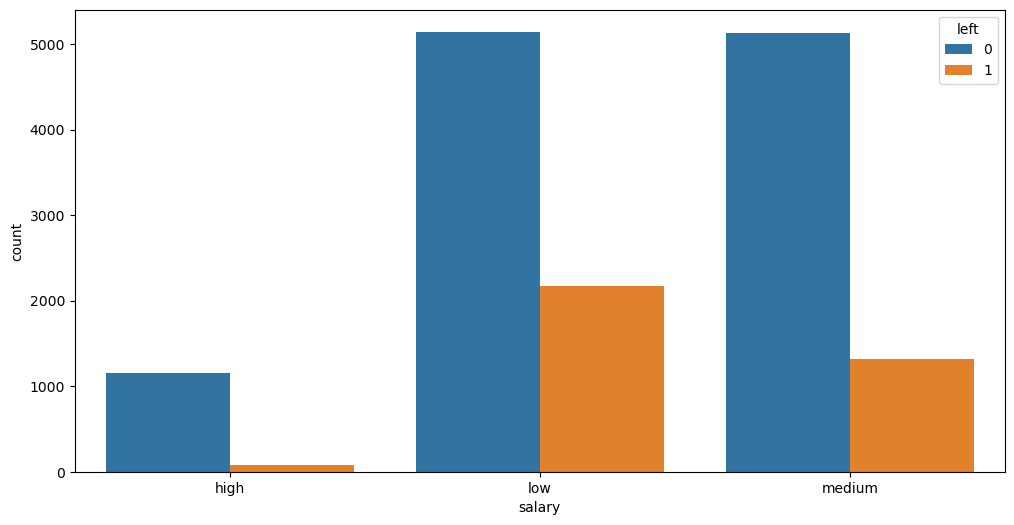

In [61]:
sns.barplot('salary','count',hue='left', data=df_salary)

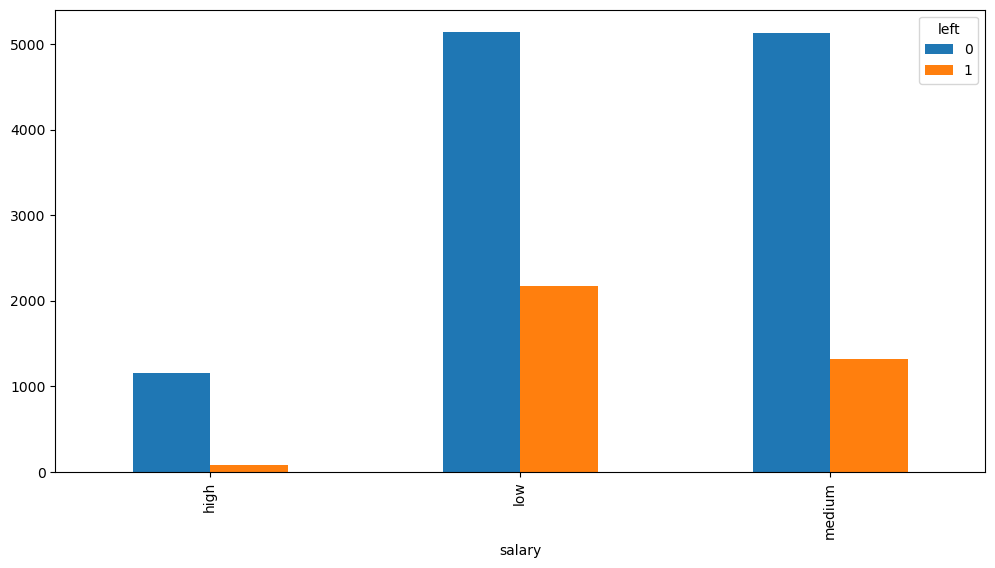

In [62]:
#OR
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [49]:
#import matplotlib
#matplotlib.rcParams['figure.figsize']=(12,6)
#sns.barplot('Department','left',data=df)

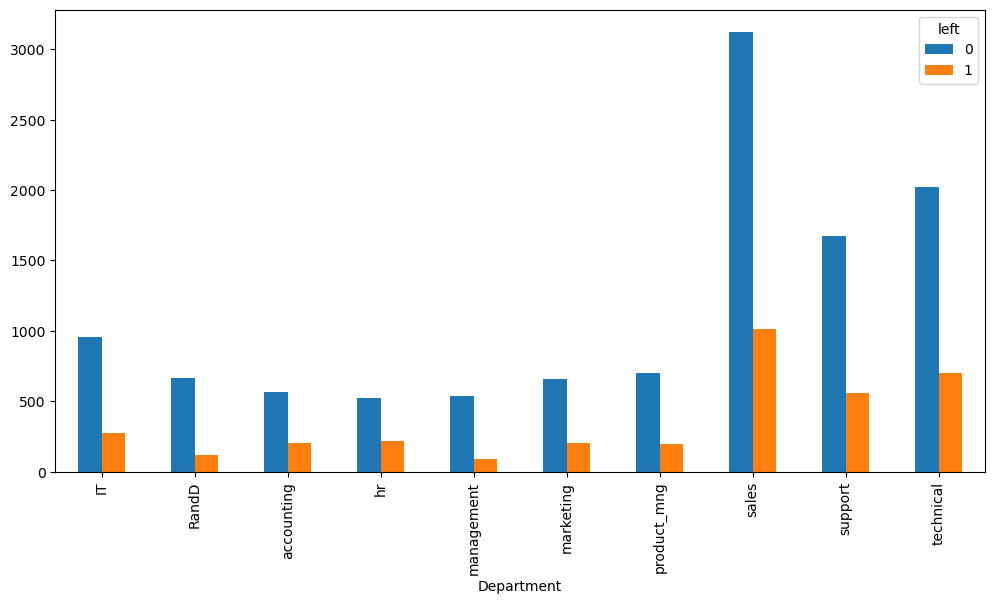

In [63]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

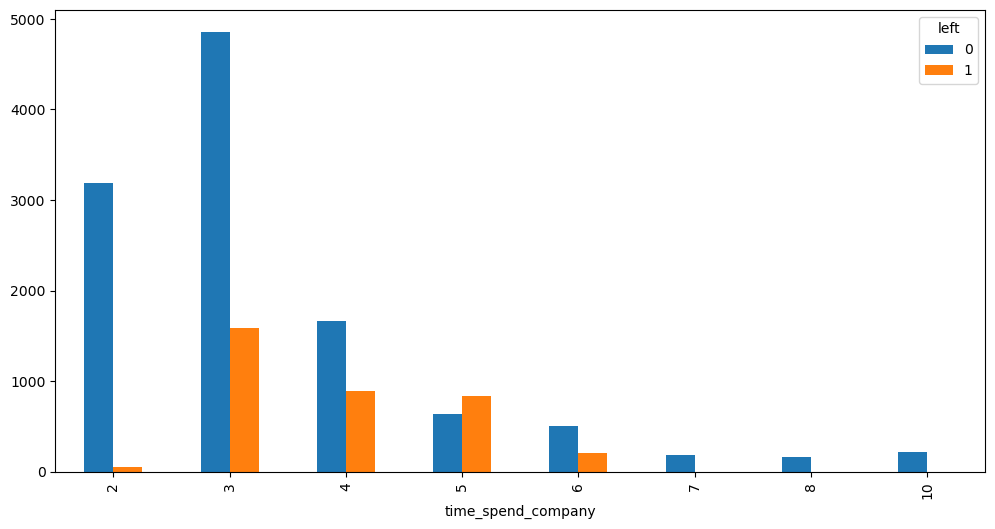

In [64]:
pd.crosstab(df.time_spend_company,df.left).plot(kind='bar')

Factors are 

Satisfaction level, avg monthly hours,time spend,promotion,salary

In [78]:
subdf=df[['satisfaction_level','average_montly_hours','time_spend_company','promotion_last_5years','salary']]
subdf.head(3)

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary
0,0.38,157,3,0,low
1,0.80,262,6,0,medium
2,0.11,272,4,0,medium


In [88]:
#Label Encoding salary (this can also be done using get_dummies)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
subdf['salary']=le.fit_transform(subdf.salary)

C:\Users\saras\AppData\Local\Temp\ipykernel_24380\3555792148.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['salary']=le.fit_transform(subdf.salary)


In [80]:
subdf.head(3)

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary
0,0.38,157,3,0,1
1,0.80,262,6,0,2
2,0.11,272,4,0,2


In [71]:
subdf['salary'].unique()

array([1, 2, 0])

In [81]:
X=subdf
y=df.left

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [84]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [86]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
model.score(X_test,y_test)

0.7676666666666667

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
